## Python notebook template block Adventure Work 
#### Your Name:
#### Your University/College/ Major
#### Your Email: 

As of now, you created a new notebook for your study with the related contents. However, when working on a project in the real life, all your data and code needs to be in one place for the project. Going forward in the block, all of the code that you generate with regard to the final project about AD should be in this one template. Go back to the code you wrote, evaluate if it is according to [PEP8](https://peps.python.org/pep-0008/) style guide and adjust where necessary. 

This template provides you with a natural flow through the steps of a traditional data science project. Do not forget to clearly add comments to your code. If you would like to add more stucture, add extra mark down blocks to explain what you are doing. 

⚠️Important! Before handing it in, run all of your code. All your cells need to show outputs. This is necessary for grading!⚠️


### Add imports here
When working in .py files, you usually have all your package imports at the top of your code. This makes it easy to get a good overview of the packages that you are using and importing. As of now, we are working in .ipynb, but it is good practice to already start implementing these structures. Add all the imports that you use in all of your code in the code block below. In this way, you do not need to add it in every cell.

In [1]:
# Add your package imports here
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

### Load the data

After your package imports, you usually load your data. This is what you will be working with and what your code will be based on.

In [2]:
data = pd.read_excel("./BikeBuyers2.xlsx")
print(data.info())
# 备份原始数据
data_backup = data.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProspectiveBuyerKey   2059 non-null   int64         
 1   ProspectAlternateKey  2059 non-null   int64         
 2   FirstName             2059 non-null   object        
 3   MiddleName            1207 non-null   object        
 4   LastName              2059 non-null   object        
 5   BirthDate             2059 non-null   datetime64[ns]
 6   MaritalStatus         2059 non-null   object        
 7   Gender                2059 non-null   object        
 8   EmailAddress          2059 non-null   object        
 9   YearlyIncome          1874 non-null   float64       
 10  TotalChildren         2018 non-null   float64       
 11  NumberChildrenAtHome  2059 non-null   int64         
 12  Education             2059 non-null   object        
 13  Occupation        

In [3]:
data.head()

,ProspectiveBuyerKey,ProspectAlternateKey,FirstName,MiddleName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,YearlyIncome,...,NumberCarsOwned,AddressLine1,AddressLine2,City,StateProvinceCode,PostalCode,Phone,Salutation,Amount,Category
0,1,21596444800,Adam,NaN,Alexander,1940-07-02,M,M,aalexander@lucernepublishing.com,40000.0,...,2.0,566 S. Main,NaN,Cedar City,UT,84720,516-555-0187,Mr.,0,Category 5
1,2,3003,Adrienne,NaN,Alonso,1944-09-06,M,F,aalonso@alpineskihouse.com,80000.0,...,2.0,7264 St. Peter Court,NaN,Colma,CA,94014,607-555-0119,Ms.,4,Category 3
2,3,1077,Alfredo,B,Alvarez,1958-10-01,S,M,aalvarez@fineartschool.net,130000.0,...,4.0,8850 Via Del Sol,NaN,Lynnwood,WA,98036,1 (11) 500 555-0143,Mr.,1,Category 4
3,4,4779,Arthur,A,Arun,1979-09-23,S,M,aarun@adventure-works.com,50000.0,...,2.0,7515 Royal Oak Rd.,NaN,Chula Vista,CA,91910,403-555-0186,Mr.,4,Category 1
4,5,38032399400,Andrea,M,Bailey,1959-10-28,M,F,abailey@lucernepublishing.com,10000.0,...,0.0,2500 North Stemmons Freeway,NaN,Dallas,TX,75201,1 (11) 500 555-0113,Ms.,4,Category 9


## Data Management and Understanding

### Data Cleansing
In the following section plug in all of your relevant python codes and explanations related to data cleansing. 

In [4]:
# add your code here for data cleaning of the adventure data set INCOME
data.duplicated().any()

False

In [5]:
data.isnull().any()

ProspectiveBuyerKey     False
ProspectAlternateKey    False
FirstName               False
MiddleName               True
LastName                False
BirthDate               False
MaritalStatus           False
Gender                  False
EmailAddress            False
YearlyIncome             True
TotalChildren            True
NumberChildrenAtHome    False
Education               False
Occupation              False
HouseOwnerFlag          False
NumberCarsOwned          True
AddressLine1            False
AddressLine2             True
City                    False
StateProvinceCode       False
PostalCode              False
Phone                   False
Salutation              False
Amount                  False
Category                False
dtype: bool

In [6]:
columns_to_drop = ['FirstName', 'MiddleName', 'LastName', 'EmailAddress', 'AddressLine1', 'AddressLine2','Occupation', 'Education', 'City', 'StateProvinceCode', 'Salutation', 'Category', 'Phone']
data = data.drop(columns=columns_to_drop)

## Replacing NaN values with the mean value

In [7]:
# Columns with NaN values to be replaced with mean
columns_with_nan = [ 'YearlyIncome', 'TotalChildren', 'NumberCarsOwned']

# Replace NaN with mean (only for numerical columns, and apply specific logic for others)
for column in columns_with_nan:
    if data[column].dtype == 'object':
        data[column].fillna('Unknown', inplace=True)
    else:
        data[column].fillna(data[column].median(), inplace=True)

C:\Users\10603\AppData\Local\Temp\ipykernel_22772\2250733237.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)
C:\Users\10603\AppData\Local\Temp\ipykernel_22772\2250733237.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [8]:
data['Gender'] = data['Gender'].map({'M': 1, 'F': 0})
data['MaritalStatus'] = data['MaritalStatus'].map({'M': 1, 'S': 0})

## Adding Age column and drop BirthDate column

In [9]:
# Convert BirthDate to datetime
data['BirthDate'] = pd.to_datetime(data['BirthDate'])

# Calculate age
current_year = datetime.now().year
data['Age'] = current_year - data['BirthDate'].dt.year

# Drop the original BirthDate column if not needed
data.drop(columns=['BirthDate'], inplace=True)

In [10]:
data.head(5)

,ProspectiveBuyerKey,ProspectAlternateKey,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned,PostalCode,Amount,Age
0,1,21596444800,1,1,40000.0,3.0,0,1,2.0,84720,0,84
1,2,3003,1,0,80000.0,4.0,0,1,2.0,94014,4,80
2,3,1077,0,1,130000.0,3.0,4,1,4.0,98036,1,66
3,4,4779,0,1,50000.0,0.0,0,1,2.0,91910,4,45
4,5,38032399400,1,0,10000.0,2.0,0,1,0.0,75201,4,65


In [11]:
# Add your exploratory data analysis of the NAC data here. You can add Mark Down blocks (or output f-strings) to provide explanations to your code, alongside comments made in your code. 
data.describe()

,ProspectiveBuyerKey,ProspectAlternateKey,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned,PostalCode,Amount,Age
count,2059.000000,2.059000e+03,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000
mean,1030.000000,1.904516e+10,0.491501,0.503643,52831.471588,1.887810,1.048567,0.597377,1.571151,87420.840699,2.747936,58.311802
std,594.526422,2.903412e+10,0.500049,0.500108,27556.748768,1.639391,1.538167,0.490545,1.124929,19922.592960,1.557480,11.295695
min,1.000000,2.300000e+01,0.000000,0.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,1906.000000,0.000000,40.000000
25%,515.500000,3.762000e+03,0.000000,0.000000,30000.000000,0.000000,0.000000,0.000000,1.000000,91203.000000,1.000000,50.000000
50%,1030.000000,8.219000e+03,0.000000,1.000000,50000.000000,2.000000,0.000000,1.000000,2.000000,94014.000000,4.000000,57.000000
75%,1544.500000,3.527752e+10,1.000000,1.000000,70000.000000,3.000000,2.000000,1.000000,2.000000,98004.000000,4.000000,65.000000
max,2059.000000,9.994441e+10,1.000000,1.000000,170000.000000,5.000000,5.000000,1.000000,4.000000,99362.000000,5.000000,101.000000


### Visualizations

Include all the visualizations you made in this section. Use the blocks below to enter the code for graphs you created with matplotlib (or seaborn, bokeh, or another visualization package). 

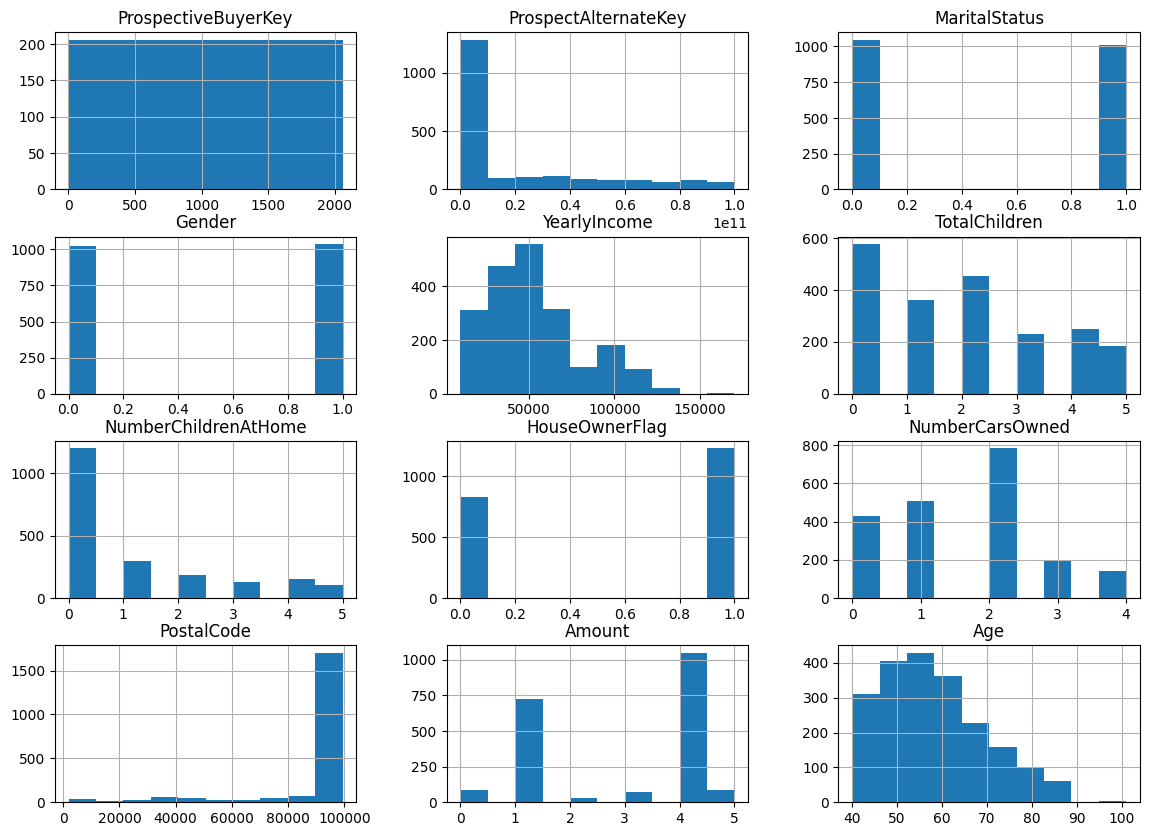

In [12]:
# Add visualizations here that you made to present insights in the adventure data. Create a new codeblock for every graph. Add markdown blocks to describe your graphs where necessary.
# Histograms for distribution
data.hist(figsize=(14, 10))
plt.show()

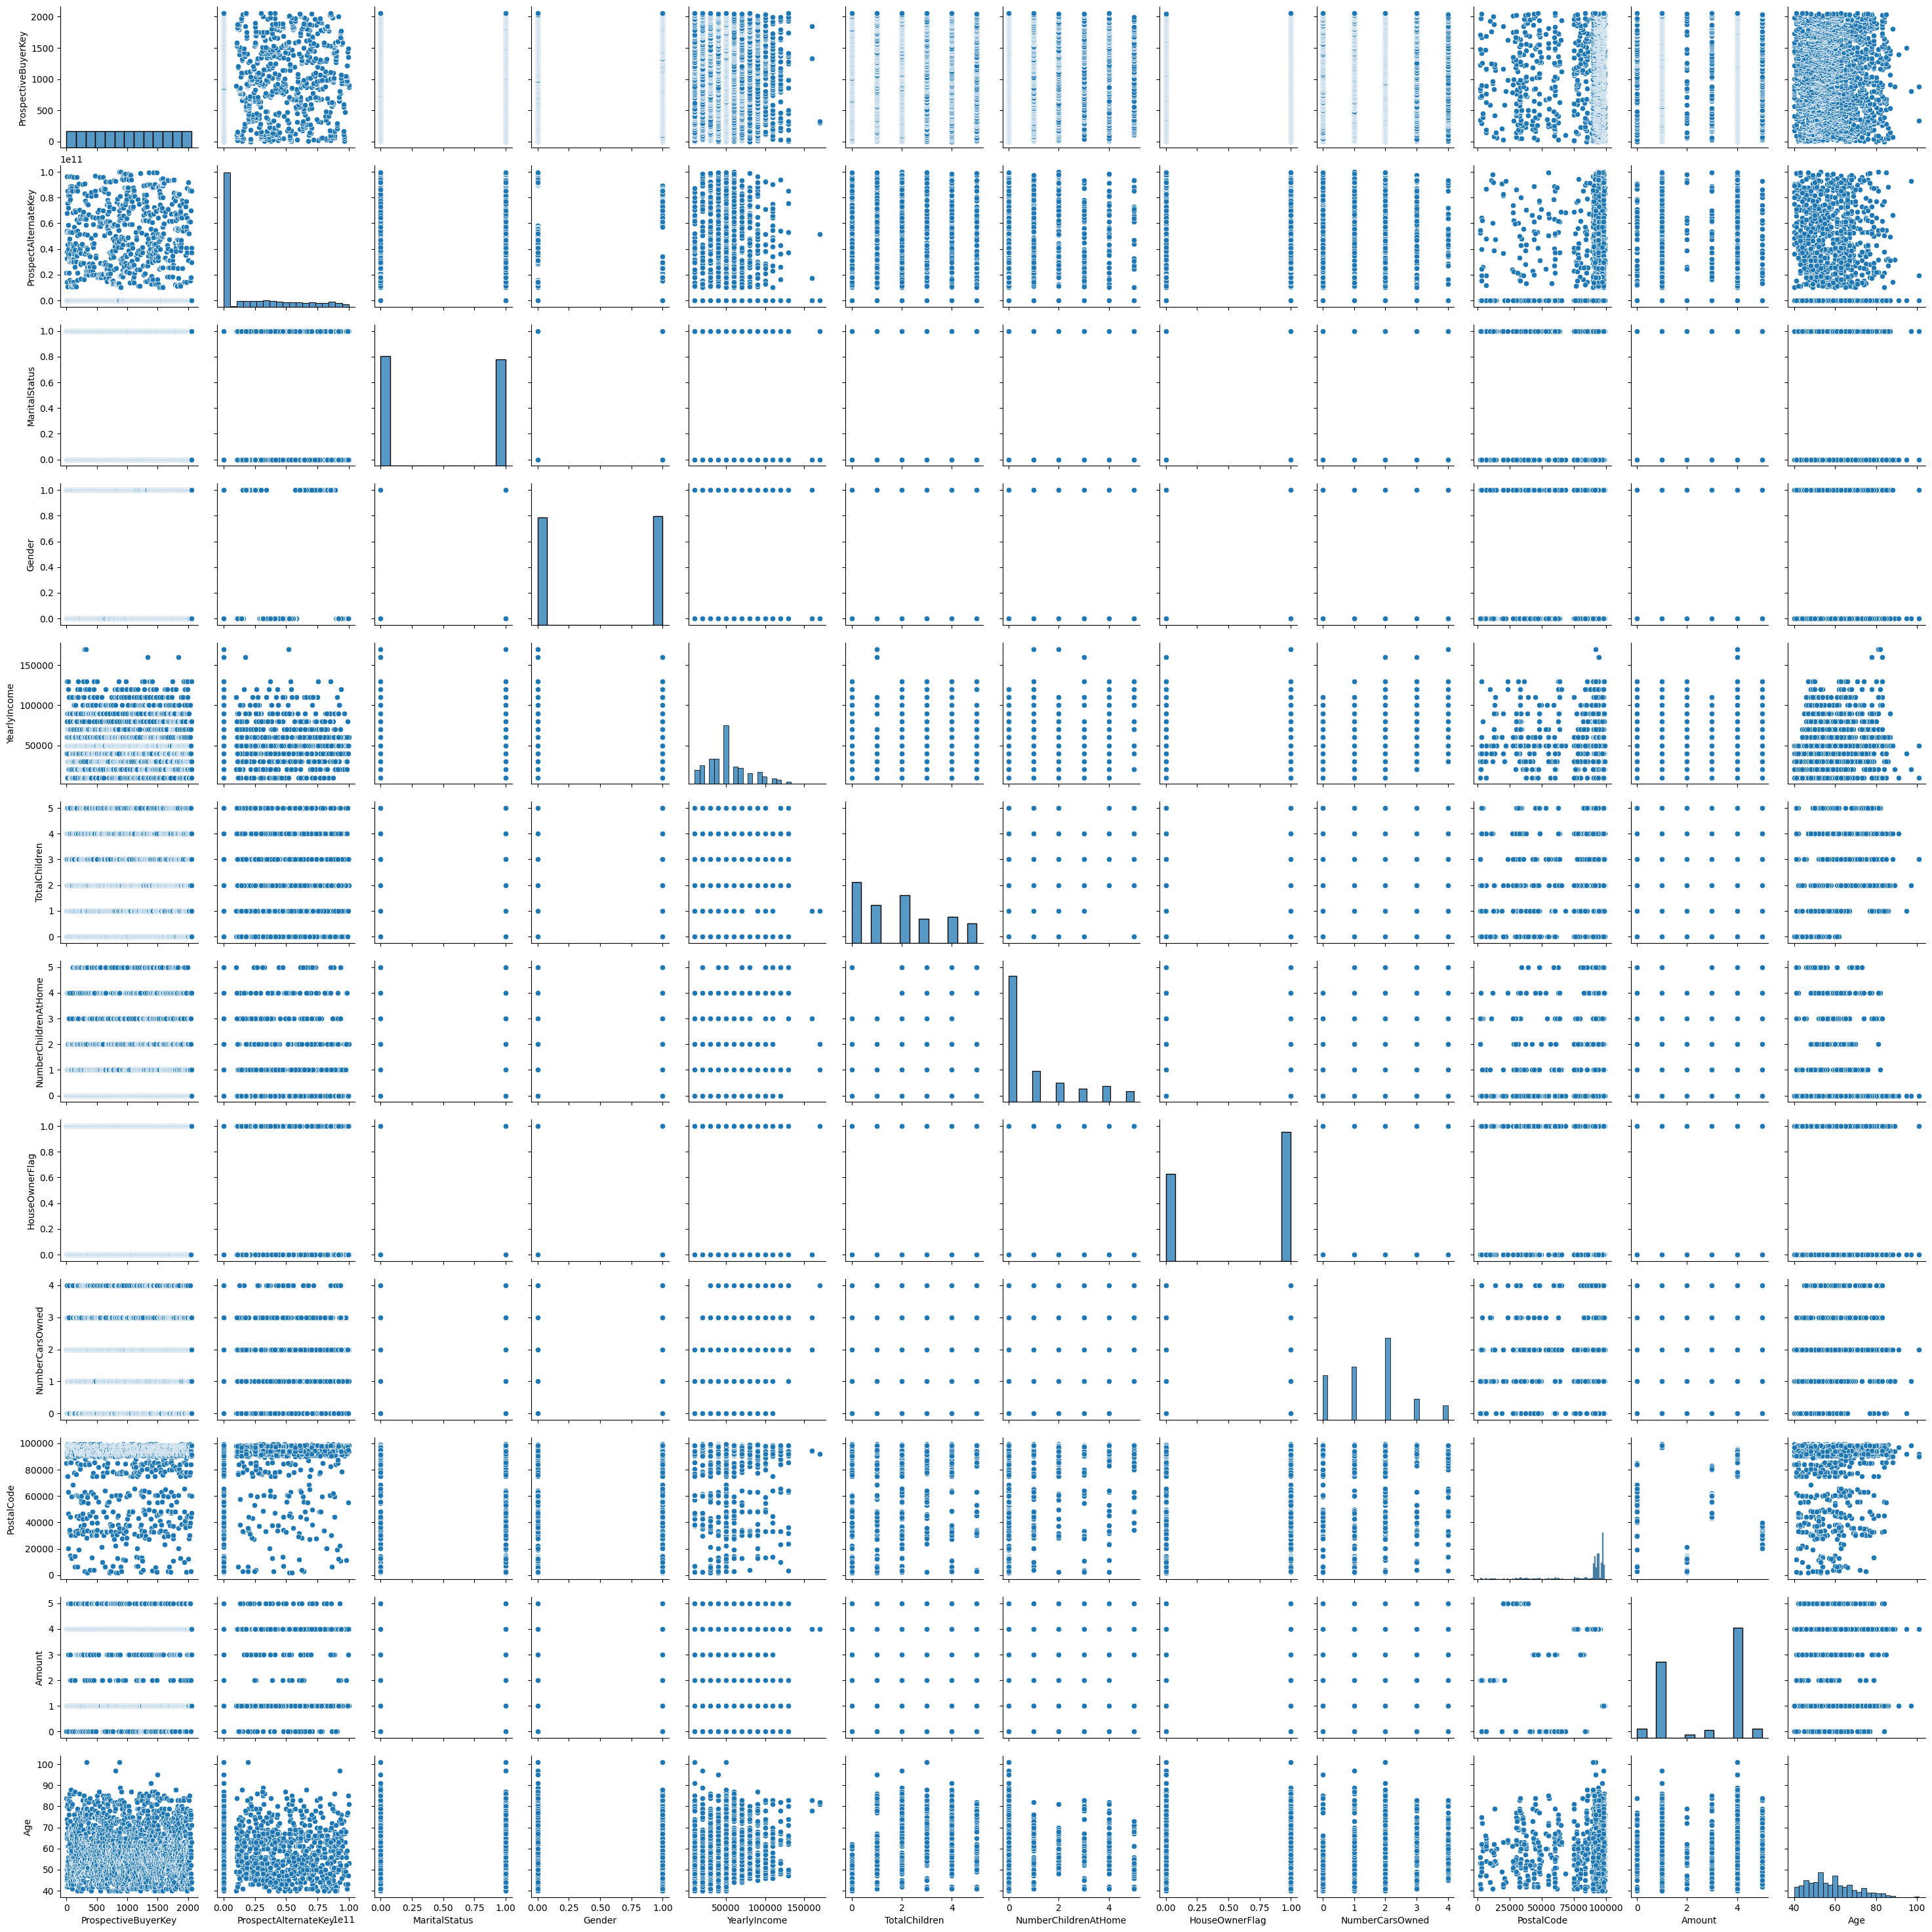

In [13]:
# Pairplot to see pairwise relationships
sns.pairplot(data)
plt.show()

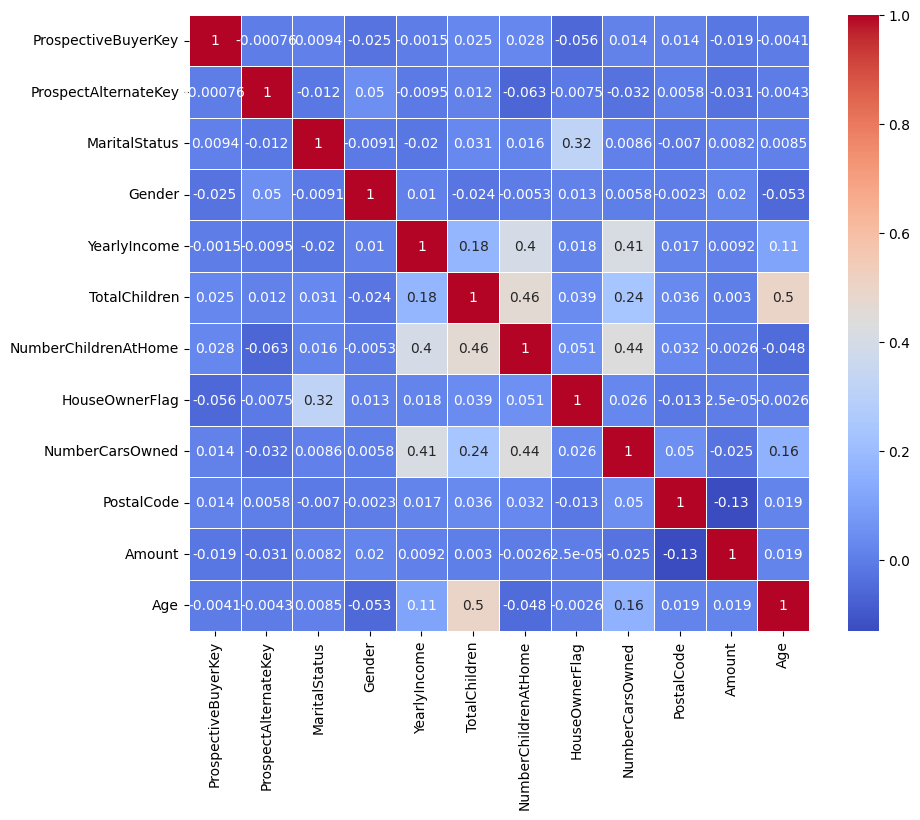

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

#### Correlation Analysis and Feature Selection

In [15]:
data.head(15)

,ProspectiveBuyerKey,ProspectAlternateKey,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned,PostalCode,Amount,Age
0,1,21596444800,1,1,40000.0,3.0,0,1,2.0,84720,0,84
1,2,3003,1,0,80000.0,4.0,0,1,2.0,94014,4,80
2,3,1077,0,1,130000.0,3.0,4,1,4.0,98036,1,66
3,4,4779,0,1,50000.0,0.0,0,1,2.0,91910,4,45
4,5,38032399400,1,0,10000.0,2.0,0,1,0.0,75201,4,65
5,6,67701756358,0,1,50000.0,0.0,0,0,2.0,98371,1,46
6,7,14496465921,1,0,50000.0,1.0,1,1,2.0,94014,4,50
7,8,96338913440,1,0,40000.0,3.0,0,1,2.0,90232,4,67
8,9,467,1,1,90000.0,2.0,0,1,0.0,90210,4,54
9,10,53313373327,1,0,40000.0,5.0,0,0,3.0,98366,1,74


✍️ I chose the features above because ...

In [16]:
# Check for any correlations
print(data.corr())

                      ProspectiveBuyerKey  ProspectAlternateKey  \
ProspectiveBuyerKey              1.000000             -0.000760   
ProspectAlternateKey            -0.000760              1.000000   
MaritalStatus                    0.009408             -0.011962   
Gender                          -0.024529              0.050151   
YearlyIncome                    -0.001512             -0.009512   
TotalChildren                    0.025071              0.012490   
NumberChildrenAtHome             0.028224             -0.062852   
HouseOwnerFlag                  -0.056233             -0.007450   
NumberCarsOwned                  0.014424             -0.032004   
PostalCode                       0.014469              0.005846   
Amount                          -0.018590             -0.030751   
Age                             -0.004077             -0.004278   

                      MaritalStatus    Gender  YearlyIncome  TotalChildren  \
ProspectiveBuyerKey        0.009408 -0.024529     

## Machine Learning

### Identifying basic Machine Learning applications.
In the following subsection, show your understanding of each of the listed Machine Learning algorithms. Excecute these algorithms on the adventure dataset.

❗Remember! All your package imports should be on top of this notebook.

#### Simple machine learning modelling pipeline

#### Linear regression

### 使用TotalChildren预测YearlyIcome

模型的均方误差(MSE)为: 737158453.4634285
模型的系数为: [[3731.79193285]]
模型的截距为: [45422.27171069]
R^2 统计量为: 0.02878390084784621


d:\miniconda\envs\torch\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


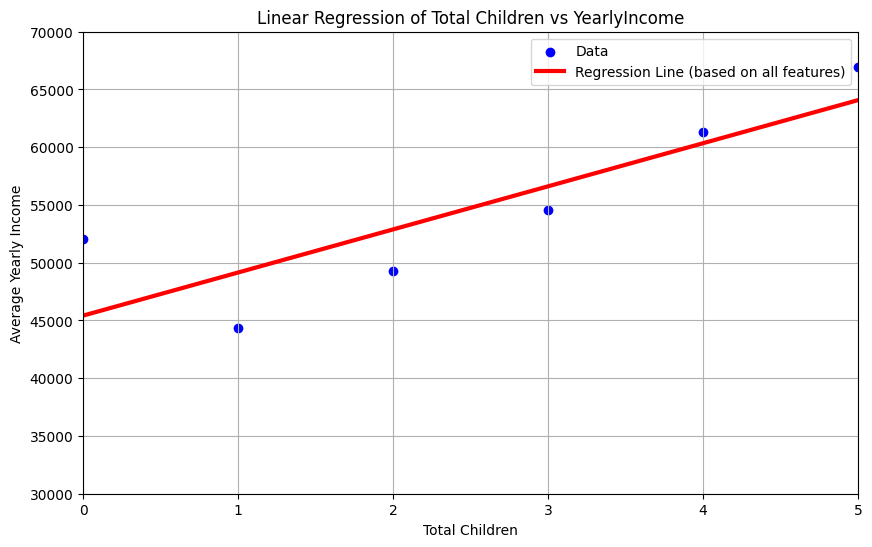

In [58]:
columns_of_interest = ['TotalChildren', 'YearlyIncome']
df_selected = data[columns_of_interest]
# 删除含有空值的行
df_cleaned = df_selected.dropna()
# 准备自变量(X)和应变量(y)
grouped = df_cleaned.groupby('TotalChildren')['YearlyIncome'].mean().reset_index()
X = grouped[['TotalChildren']]
y = grouped['YearlyIncome']

# 分割数据为训练集和测试集
X_train = X
y_train = y
X_test = data[['TotalChildren']]

# 将数据转换为numpy数组
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values

# 将数据转换为numpy数组
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# 将数据转换为numpy数组
y_test = data['YearlyIncome']


# 建立线性回归模型
model = LinearRegression()
# 训练模型
model.fit(X_train, y_train)

# 预测测试集
y_pred = model.predict(X_test)
# 评估模型
mse = mean_squared_error(y_test, y_pred)

print(f"模型的均方误差(MSE)为: {mse}")
print(f"模型的系数为: {model.coef_}")
print(f"模型的截距为: {model.intercept_}")
print(f"R^2 统计量为: {model.score(X_test, y_test)}")


# 可视化：选择YearlyIncome作为X轴，并在训练集上绘制回归直线
plt.figure(figsize=(10, 6))
plt.scatter(X['TotalChildren'], y, color='blue', label='Data')

# 为了绘制回归直线，我们使用训练集中的一个子集（或全部）来预测y值
y_pred = model.predict(X)

plt.plot(X['TotalChildren'], y_pred, color='red', linewidth=3,
         label='Regression Line (based on all features)')
plt.xlim(0, 5)
plt.ylim(30000, 70000)
plt.xlabel('Total Children')
plt.ylabel('Average Yearly Income')
plt.title('Linear Regression of Total Children vs YearlyIncome')
plt.legend()
plt.grid(True)
plt.show()

#### Logistic regression

模型的准确率为: 0.4103933948518698
模型的系数为: [[4.68743916e-05]]
模型的截距为: [-5.16191099]


d:\miniconda\envs\torch\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


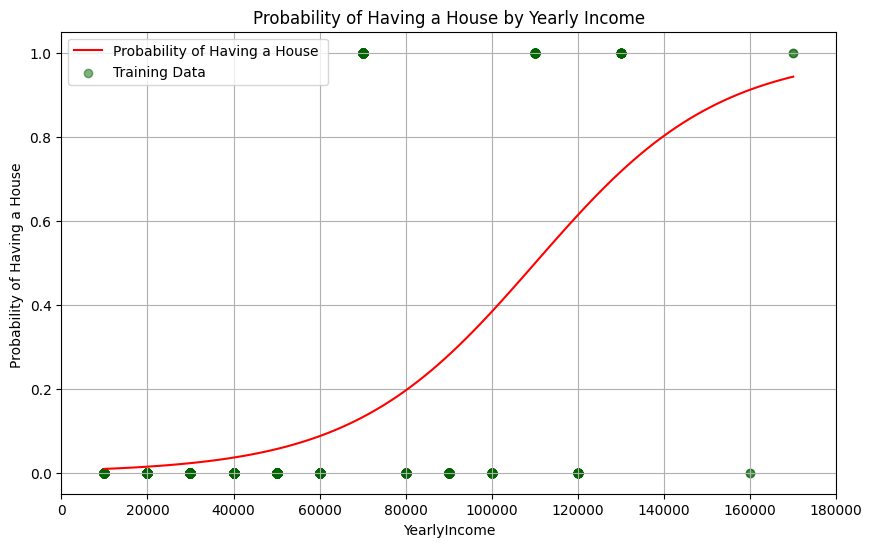

In [20]:
# 按YearlyIncome分组并计算每个组的总和
# Group by YearlyIncome and calculate the sum of each group
grouped = data.groupby('YearlyIncome')['HouseOwnerFlag'].agg(['count', 'sum']).reset_index()  
grouped['NewHouseOwnerFlag'] = (grouped['sum'] > grouped['count'] / 1.55).astype(int) 
# 合并原始DataFrame和分组后的结果，创建新的New列
# Merge the original DataFrame and grouped results to create a new New column
df_merged = data.merge(grouped[['YearlyIncome', 'NewHouseOwnerFlag']], on='YearlyIncome', how='left')  
df_merged['New'] = df_merged['NewHouseOwnerFlag']  
# 选择并处理数据
# Select and process data
columns_of_interest = ['YearlyIncome', 'New']  
df_selected = df_merged[columns_of_interest]  
df_cleaned = df_selected.dropna()  
# 划分特征和目标变量
# Divide features and target variables
X = df_cleaned[['YearlyIncome']]  # 特征集
y = df_cleaned['New']  # 目标变量
# 划分训练集和测试集
# Divide the training set and testing set
X_train = X
y_train = y
X_test = data[['YearlyIncome']]
y_test = data['HouseOwnerFlag']
# 训练模型
# Training model
model = LogisticRegression()
model.fit(X_train, y_train)
# 预测和评估
# Prediction and evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"模型的准确率为: {accuracy}")
print(f"模型的系数为: {model.coef_}")
print(f"模型的截距为: {model.intercept_}")
# 绘制预测概率图
# Draw a prediction probability graph
X_range = np.linspace(X['YearlyIncome'].min(), X['YearlyIncome'].max(), 100).reshape(-1, 1)
y_pred_prob = model.predict_proba(X_range)[:, 1]
plt.figure(figsize=(10, 6))
plt.plot(X_range[:, 0], y_pred_prob, label='Probability of Having a House ', color='red')
plt.scatter(X_train['YearlyIncome'], y_train, color='darkgreen', alpha=0.5, label='Training Data')
plt.xlim(0, 180000)
plt.xlabel('YearlyIncome')  
plt.ylabel('Probability of Having a House ')  
plt.title('Probability of Having a House by Yearly Income')  
plt.legend()  
plt.grid(True)  
plt.show()

#### KNN

In [60]:
# 恢复Category
# recover category
data['Category'] = data_backup['Category']
data['BuyFlag'] = np.where(data['Amount'] > 0, 1, 0)
le = LabelEncoder()
data['Education'] = le.fit_transform(data_backup['Education'])
data['Occupation'] = le.fit_transform(data_backup['Occupation'])
data['StateProvinceCode'] = le.fit_transform(data_backup['StateProvinceCode'])

Accuracy: 0.61


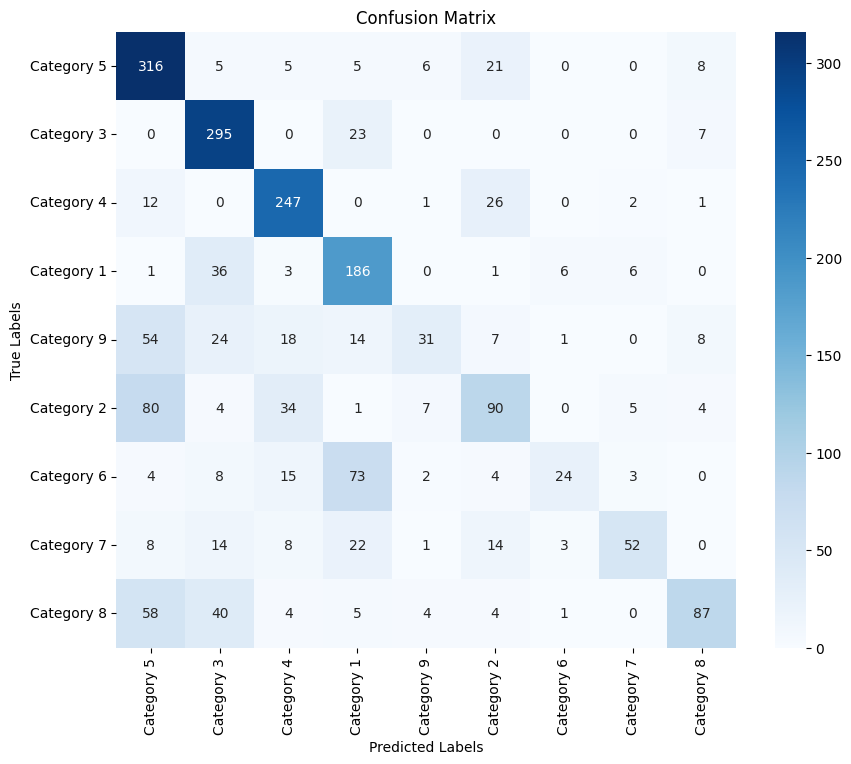

In [64]:
#特征选择
features = data[['ProspectiveBuyerKey', 'Age', 'MaritalStatus', 'Gender','Occupation',
    'YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome', 'StateProvinceCode','Education',
    'HouseOwnerFlag', 'NumberCarsOwned','Amount','StateProvinceCode']]
labels = data['Category']
# 数据标准化
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
# 训练模型
ans=0
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.3, random_state=96)
knn = KNeighborsClassifier(n_neighbors=7) 
knn.fit(X_train, y_train)
# 预测
predictions = knn.predict(X_test)
# 评估
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')
# 假设你已经有了预测结果和真实标签
# 真实标签
true_labels = data['Category']
# 预测结果
predicted_labels = knn.predict(features_scaled)
# 创建混淆矩阵
cm = confusion_matrix(true_labels, predicted_labels)
# 使用seaborn绘制混淆矩阵热图
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data['Category'].unique(), yticklabels=data['Category'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')  
plt.show()

Accuracy: 1.00


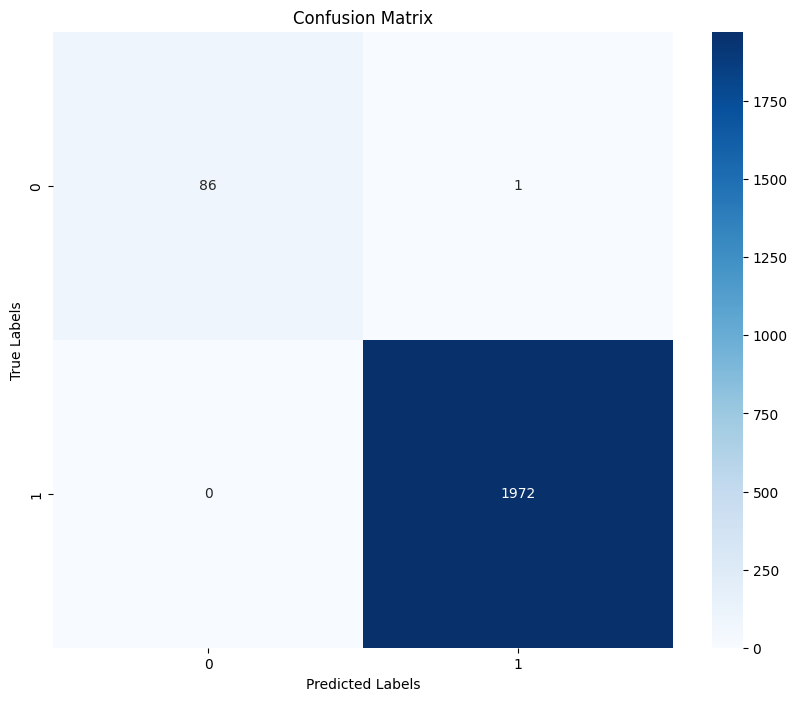

In [65]:
#特征选择
features = data[['StateProvinceCode']]
labels = data['BuyFlag']
# 数据标准化
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
# 训练模型
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.1, random_state=8)
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train, y_train)
# 预测
predictions = knn.predict(X_test)
# 评估
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')
# 假设你已经有了预测结果和真实标签
# 真实标签
true_labels = data['BuyFlag']
# 预测结果
predicted_labels = knn.predict(features_scaled)
# 创建混淆矩阵
cm = confusion_matrix(true_labels, predicted_labels)
# 使用seaborn绘制混淆矩阵热图
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data['BuyFlag'].unique(), yticklabels=data['BuyFlag'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')  
plt.show()

In [66]:
# 重新删除category
data = data.drop(columns=['Category'])

#### Tree-based model

In [67]:
# 恢复Category
# recover category
data['Category'] = data_backup['Category']

train score:1.000; test score:0.625
Accuracy: 0.6245954692556634
Classification Report:
              precision    recall  f1-score   support

  Category 1       0.67      0.70      0.69       120
  Category 2       0.80      0.75      0.78        92
  Category 3       0.81      0.72      0.76        75
  Category 4       0.62      0.68      0.65        68
  Category 5       0.58      0.57      0.58        54
  Category 6       0.43      0.45      0.44        62
  Category 7       0.41      0.54      0.47        39
  Category 8       0.66      0.43      0.52        44
  Category 9       0.50      0.53      0.52        64

    accuracy                           0.62       618
   macro avg       0.61      0.60      0.60       618
weighted avg       0.63      0.62      0.63       618



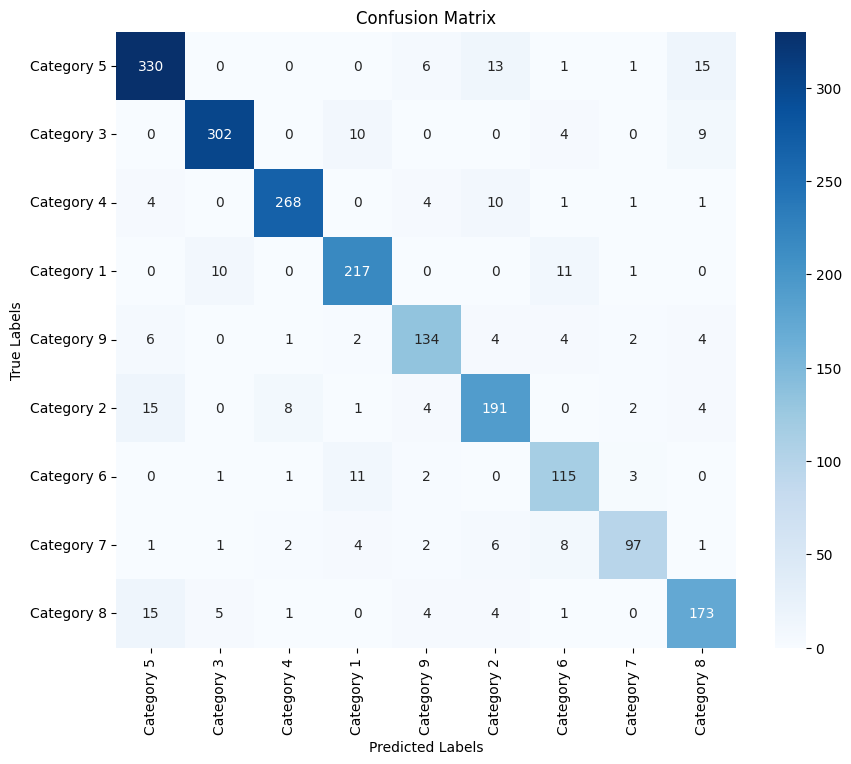

In [70]:
# Enter your code here for tree-based decision model

features = data[['ProspectiveBuyerKey', 'Age', 'MaritalStatus', 'Gender','Occupation',
    'YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome', 'StateProvinceCode','Education',
    'HouseOwnerFlag', 'NumberCarsOwned','Amount','StateProvinceCode']]
labels=data['Category']
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(random_state=66)

# Training the classifier on the training data
clf.fit(X_train, y_train)

# Making predictions on the test data
y_pred = clf.predict(X_test)
# Evaluating the model
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("train score:{0:.3f}; test score:{1:.3f}".format(train_score, test_score))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# If you want a detailed classification report
report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{report}")
# 假设你已经有了预测结果和真实标签
# 真实标签
true_labels = data['Category']
# 预测结果
predicted_labels = clf.predict(features_scaled)
# 创建混淆矩阵
cm = confusion_matrix(true_labels, predicted_labels)
# 使用seaborn绘制混淆矩阵热图
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data['Category'].unique(), yticklabels=data['Category'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')  
plt.show()

In [27]:
# 重新删除category
data = data.drop(columns=['Category'])

#### Gradient Boosting Trees and SVM

In [28]:
# Enter your code here for Gradient Boosting

In [29]:
# Enter your code here for SVM

#### Unsupervised learning with K-Means

# Kmeans: Test 1

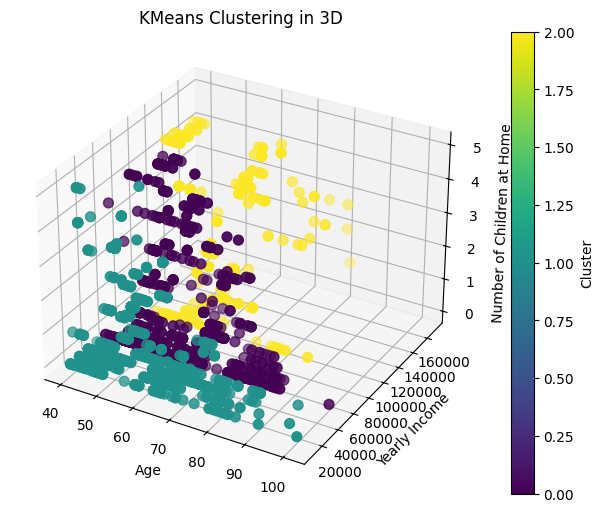

In [30]:
# 执行 KMeans 聚类
# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(data[['Age', 'YearlyIncome', 'NumberChildrenAtHome']])

# 创建三维散点图
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# 绘制数据点
# Plot the data points
scatter = ax.scatter(data['Age'], data['YearlyIncome'], data['NumberChildrenAtHome'], c=data['cluster'], cmap='viridis', s=50)

# 设置轴标签
# Set axis labels
ax.set_title('KMeans Clustering in 3D')
ax.set_xlabel('Age')
ax.set_ylabel('Yearly Income')
ax.set_zlabel('Number of Children at Home')

# 添加颜色条
# Add a color bar
colorbar = fig.colorbar(scatter, ax=ax, label='Cluster')

# 显示图表
# Show the plot
plt.show()


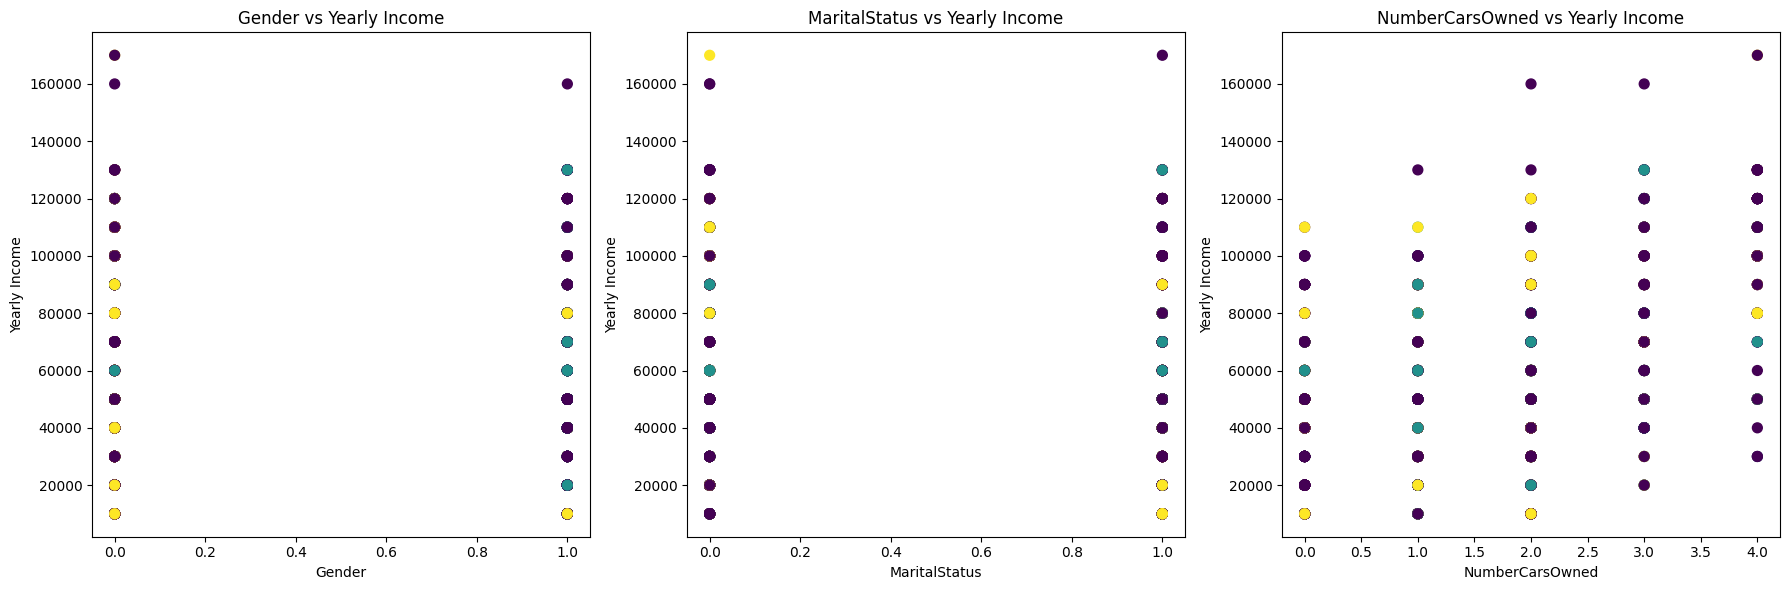

In [31]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(data)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, feature in enumerate(['Gender', 'MaritalStatus', 'NumberCarsOwned']):
    axs[i].scatter(data[feature], data['YearlyIncome'], c=data['cluster'], cmap='viridis', s=50)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Yearly Income')
    axs[i].set_title(f'{feature} vs Yearly Income')

plt.tight_layout()
plt.show()

# Kmeans: Test 2

In [32]:
# Enter your code here for K-means
n_cluster = 5
features = ['YearlyIncome']
#features = ['Age', 'MaritalStatus', 'Gender', 'YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome']
# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])
kmeans = KMeans(n_clusters=n_cluster, init='k-means++', random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

In [33]:
# Get cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_
data['YearlyIncomeCategorized'] = labels


Cluster 0 details:
Number of points: 364
Mean Yearly Income: $78,901.10
Min Yearly Income: $70,000.00
Max Yearly Income: $90,000.00
Standard Deviation: $8,456.73

Cluster 1 details:
Number of points: 310
Mean Yearly Income: $15,612.90
Min Yearly Income: $10,000.00
Max Yearly Income: $20,000.00
Standard Deviation: $4,970.32

Cluster 2 details:
Number of points: 186
Mean Yearly Income: $111,720.43
Min Yearly Income: $100,000.00
Max Yearly Income: $170,000.00
Standard Deviation: $12,871.39

Cluster 3 details:
Number of points: 722
Mean Yearly Income: $52,285.32
Min Yearly Income: $50,000.00
Max Yearly Income: $60,000.00
Standard Deviation: $4,201.78

Cluster 4 details:
Number of points: 477
Mean Yearly Income: $34,989.52
Min Yearly Income: $30,000.00
Max Yearly Income: $40,000.00
Standard Deviation: $5,005.24


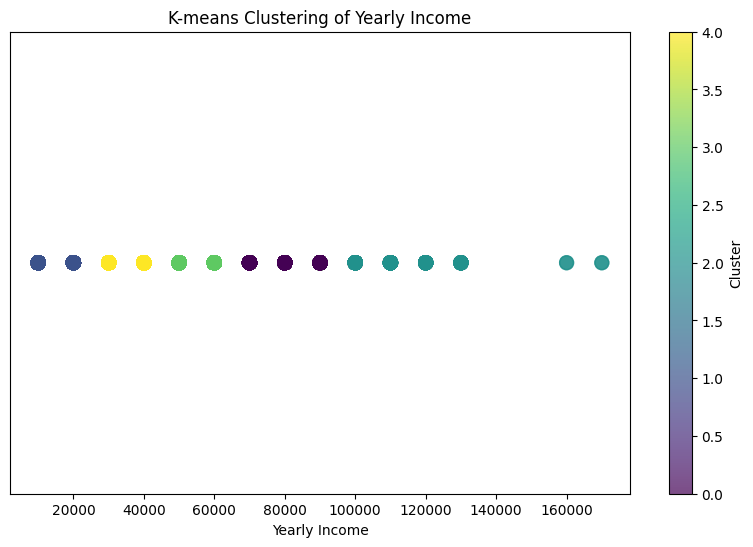

In [34]:
# Print details of each cluster
for cluster in range(n_cluster):
    subset = data[data['Cluster'] == cluster]
    print(f'\nCluster {cluster} details:')
    print(f'Number of points: {subset.shape[0]}')
    print(f'Mean Yearly Income: ${subset["YearlyIncome"].mean():,.2f}')
    print(f'Min Yearly Income: ${subset["YearlyIncome"].min():,.2f}')
    print(f'Max Yearly Income: ${subset["YearlyIncome"].max():,.2f}')
    print(f'Standard Deviation: ${subset["YearlyIncome"].std():,.2f}')

# Visualize the clustering
plt.figure(figsize=(10, 6))
plt.scatter(data['YearlyIncome'], np.zeros_like(data['YearlyIncome']), c=data['Cluster'], cmap='viridis', s=100, alpha=0.7)
plt.title('K-means Clustering of Yearly Income')
plt.xlabel('Yearly Income')
plt.yticks([])  # Remove y-axis ticks since there is no variation in the y-dimension
plt.colorbar(label='Cluster')
plt.show()

In [35]:
data.head()

,ProspectiveBuyerKey,ProspectAlternateKey,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned,PostalCode,Amount,Age,BuyFlag,Education,Occupation,StateProvinceCode,cluster,Cluster,YearlyIncomeCategorized
0,1,21596444800,1,1,40000.0,3.0,0,1,2.0,84720,0,84,0,3,3,33,2,4,4
1,2,3003,1,0,80000.0,4.0,0,1,2.0,94014,4,80,1,0,1,2,0,0,0
2,3,1077,0,1,130000.0,3.0,4,1,4.0,98036,1,66,1,3,3,35,0,2,2
3,4,4779,0,1,50000.0,0.0,0,1,2.0,91910,4,45,1,3,4,2,0,3,3
4,5,38032399400,1,0,10000.0,2.0,0,1,0.0,75201,4,65,1,3,2,32,2,1,1



Cluster 0 details:
Number of points: 413
Mean Yearly Income: $2.67
Min Yearly Income: $0.00
Max Yearly Income: $4.00
Standard Deviation: $1.28

Cluster 1 details:
Number of points: 832
Mean Yearly Income: $2.23
Min Yearly Income: $0.00
Max Yearly Income: $4.00
Standard Deviation: $1.46

Cluster 2 details:
Number of points: 814
Mean Yearly Income: $2.21
Min Yearly Income: $0.00
Max Yearly Income: $4.00
Standard Deviation: $1.44


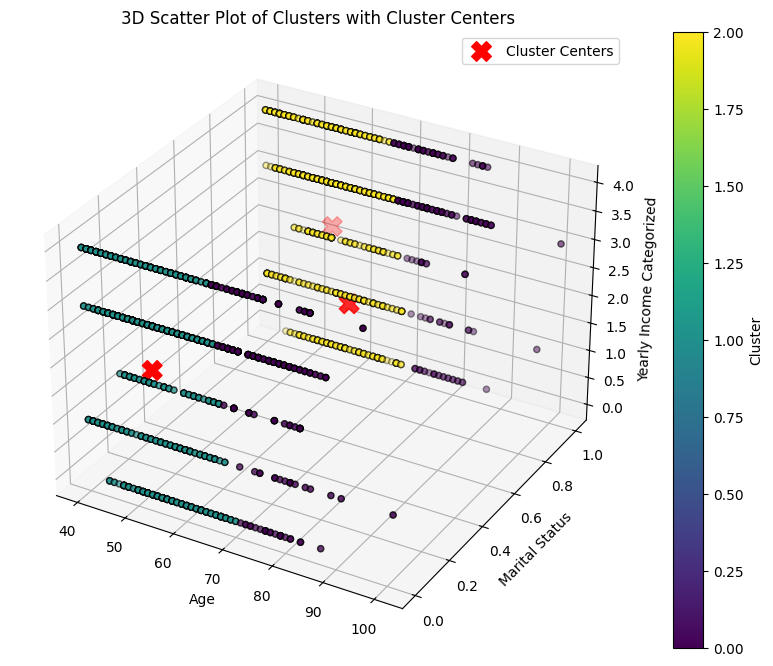

In [36]:
# Assuming 'data' is your DataFrame
features = ['Age', 'MaritalStatus', 'YearlyIncomeCategorized']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

# Apply K-means clustering
n_clusters = 3  # Choose the number of clusters
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Print details of each cluster
for cluster in range(n_clusters):
    subset = data[data['Cluster'] == cluster]
    print(f'\nCluster {cluster} details:')
    print(f'Number of points: {subset.shape[0]}')
    print(f'Mean Yearly Income: ${subset["YearlyIncomeCategorized"].mean():,.2f}')
    print(f'Min Yearly Income: ${subset["YearlyIncomeCategorized"].min():,.2f}')
    print(f'Max Yearly Income: ${subset["YearlyIncomeCategorized"].max():,.2f}')
    print(f'Standard Deviation: ${subset["YearlyIncomeCategorized"].std():,.2f}')

# Add cluster centers to the plot
# Re-transform the cluster centers to the original feature space
centers = kmeans.cluster_centers_
inverse_transformed_centers = scaler.inverse_transform(centers)

# Create the 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
sc = ax.scatter(data['Age'], data['MaritalStatus'], data['YearlyIncomeCategorized'], 
                c=data['Cluster'], cmap='viridis', marker='o', edgecolor='k')

# Plot cluster centers
ax.scatter(inverse_transformed_centers[:, 0], 
           inverse_transformed_centers[:, 1], 
           inverse_transformed_centers[:, 2], 
           c='red', s=200, marker='X', label='Cluster Centers')

# Add color bar and labels
plt.colorbar(sc, label='Cluster')
ax.set_xlabel('Age')
ax.set_ylabel('Marital Status')
ax.set_zlabel('Yearly Income Categorized')
plt.title('3D Scatter Plot of Clusters with Cluster Centers')
plt.legend()
plt.show()

# BDSCAN: test 1


Noise details:
Number of points: 127
Mean Yearly Income: $1.35
Min Yearly Income: $0.00
Max Yearly Income: $4.00
Standard Deviation: $1.37

Cluster 0 details:
Number of points: 379
Mean Yearly Income: $3.00
Min Yearly Income: $3.00
Max Yearly Income: $3.00
Standard Deviation: $0.00

Cluster 1 details:
Number of points: 150
Mean Yearly Income: $1.00
Min Yearly Income: $1.00
Max Yearly Income: $1.00
Standard Deviation: $0.00

Cluster 2 details:
Number of points: 339
Mean Yearly Income: $3.00
Min Yearly Income: $3.00
Max Yearly Income: $3.00
Standard Deviation: $0.00

Cluster 3 details:
Number of points: 233
Mean Yearly Income: $4.00
Min Yearly Income: $4.00
Max Yearly Income: $4.00
Standard Deviation: $0.00

Cluster 4 details:
Number of points: 148
Mean Yearly Income: $0.00
Min Yearly Income: $0.00
Max Yearly Income: $0.00
Standard Deviation: $0.00

Cluster 5 details:
Number of points: 226
Mean Yearly Income: $4.00
Min Yearly Income: $4.00
Max Yearly Income: $4.00
Standard Deviation: $0

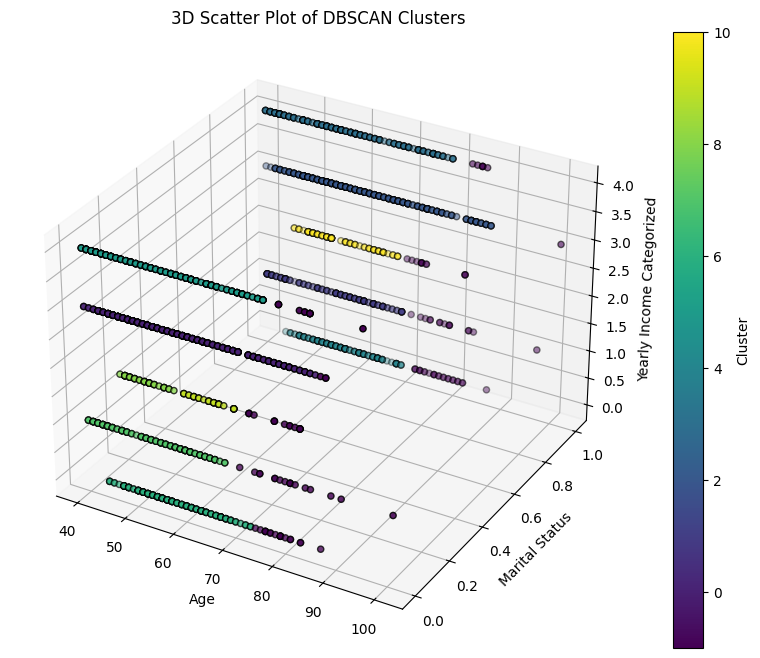

In [37]:
eps = 0.3  # Distance parameter for DBSCAN
min_samples = 20  # Minimum number of samples in a neighborhood
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
data['Cluster'] = dbscan.fit_predict(scaled_features)

# Print details of each cluster
for cluster in sorted(set(data['Cluster'])):
    if cluster == -1:
        cluster_name = 'Noise'
    else:
        cluster_name = f'Cluster {cluster}'
    
    subset = data[data['Cluster'] == cluster]
    print(f'\n{cluster_name} details:')
    print(f'Number of points: {subset.shape[0]}')
    if subset.shape[0] > 0:
        print(f'Mean Yearly Income: ${subset["YearlyIncomeCategorized"].mean():,.2f}')
        print(f'Min Yearly Income: ${subset["YearlyIncomeCategorized"].min():,.2f}')
        print(f'Max Yearly Income: ${subset["YearlyIncomeCategorized"].max():,.2f}')
        print(f'Standard Deviation: ${subset["YearlyIncomeCategorized"].std():,.2f}')

# Create the 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
sc = ax.scatter(data['Age'], data['MaritalStatus'], data['YearlyIncomeCategorized'], 
                c=data['Cluster'], cmap='viridis', marker='o', edgecolor='k')

# Add color bar and labels
plt.colorbar(sc, label='Cluster')
ax.set_xlabel('Age')
ax.set_ylabel('Marital Status')
ax.set_zlabel('Yearly Income Categorized')
plt.title('3D Scatter Plot of DBSCAN Clusters')
plt.show()

### Evaluating the performance of the model

In the following subsection include your Python code on how you evaluated your chosen model(s).

In [38]:
# Enter your code here for the model evaluation. Add your interpretation in the markdown below.

# Crosss validation for Linear Regression Model and Logistic Regression Model

In [39]:
# 线性回归模型的交叉验证评估
# Cross-validation evaluation for linear regression model
from sklearn.model_selection import cross_val_score

def evaluate_regression_model(model, X, y, cv=10):
    """
    使用交叉验证评估回归模型性能

    参数:
    model: 需要评估的回归模型
    X: 特征数据
    y: 目标变量
    cv: 交叉验证的折数 (默认是10)

    返回:
    dict: 包含交叉验证得分的字典
    """
    scoring_metrics = ['neg_mean_squared_error', 'r2']
    scores = {}
    
    for metric in scoring_metrics:
        score = cross_val_score(model, X, y, cv=cv, scoring=metric)
        scores[metric] = {
            'mean': score.mean(),
            'std': score.std()
        }
        print(f"{metric.capitalize()} - Mean: {score.mean():.4f}, Std: {score.std():.4f}")

    return scores

In [40]:
# 逻辑回归模型的交叉验证评估
# Cross-validation evaluation for logistic regression model
def evaluate_classification_model(model, X, y, cv=10):
    """
    使用交叉验证评估分类模型性能

    参数:
    model: 需要评估的分类模型
    X: 特征数据
    y: 目标变量
    cv: 交叉验证的折数 (默认是10)

    返回:
    dict: 包含交叉验证得分的字典
    """
    scoring_metrics = {
        'accuracy': 'accuracy',
        'precision': 'precision_weighted',
        'recall': 'recall_weighted',
        'f1': 'f1_weighted'
    }
    
    scores = {}
    for metric_name, scoring in scoring_metrics.items():
        score = cross_val_score(model, X, y, cv=cv, scoring=scoring)
        scores[metric_name] = {
            'mean': score.mean(),
            'std': score.std()
        }
        print(f"{metric_name.capitalize()} - Mean: {score.mean():.4f}, Std: {score.std():.4f}")

    return scores

In [41]:
# 可视化函数
def plot_scores(scores, title):
    metrics = list(scores.keys())
    means = [scores[metric]['mean'] for metric in metrics]
    stds = [scores[metric]['std'] for metric in metrics]

    x_pos = np.arange(len(metrics))

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x_pos, means, yerr=stds, alpha=0.7, capsize=10, color='skyblue')
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Scores')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(metrics)
    ax.set_title(title)
    ax.yaxis.grid(True)
    plt.show()

Neg_mean_squared_error - Mean: -1.0162, Std: 0.0942
R2 - Mean: 0.1933, Std: 0.0387


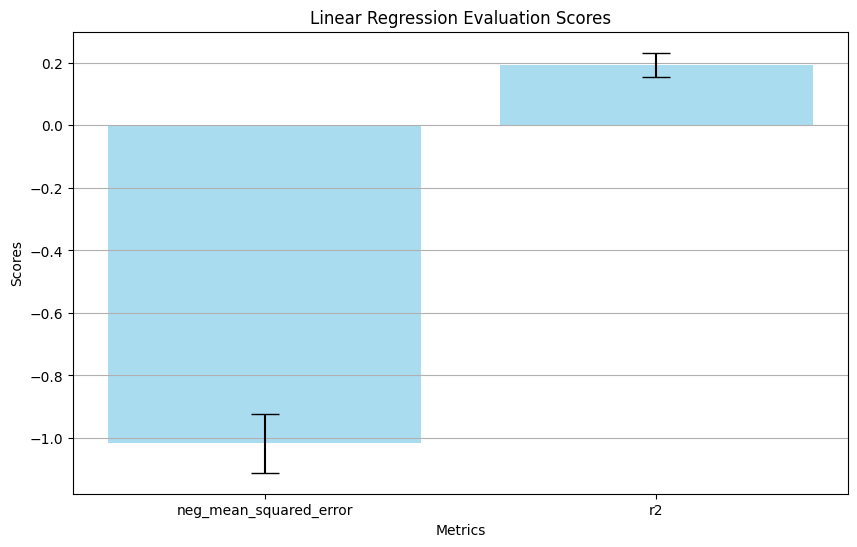

In [42]:
# 线性回归模型
X = data[['TotalChildren', 'YearlyIncome']]
y = data['NumberCarsOwned']
lr_model = car_predict

# 评估模型
lr_scores = evaluate_regression_model(lr_model, X, y, cv=10)
plot_scores(lr_scores, 'Linear Regression Evaluation Scores')

Accuracy - Mean: 0.8941, Std: 0.0114
Precision - Mean: 0.8660, Std: 0.0315
Recall - Mean: 0.8941, Std: 0.0114
F1 - Mean: 0.8701, Std: 0.0231


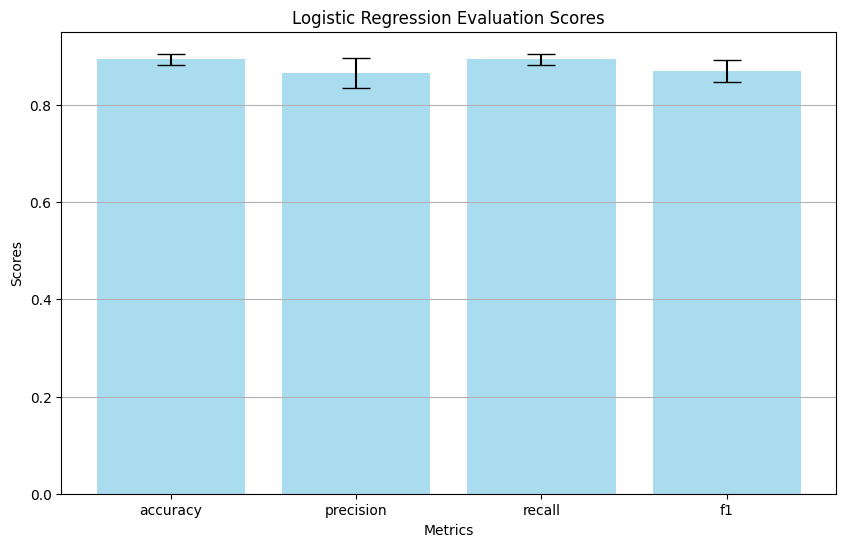

In [43]:
# 逻辑回归模型
X = df_cleaned[['YearlyIncome']]
y = df_cleaned['New']
log_reg_model = model

# 评估模型
log_reg_scores = evaluate_classification_model(log_reg_model, X, y, cv=10)
plot_scores(log_reg_scores, 'Logistic Regression Evaluation Scores')

✍️ Interpretation of the model evaluation: ...

# KNN Evalution

Accuracy - Mean: 0.7159, Std: 0.0351
Precision - Mean: 0.7211, Std: 0.0361
Recall - Mean: 0.7159, Std: 0.0351
F1 - Mean: 0.7148, Std: 0.0354


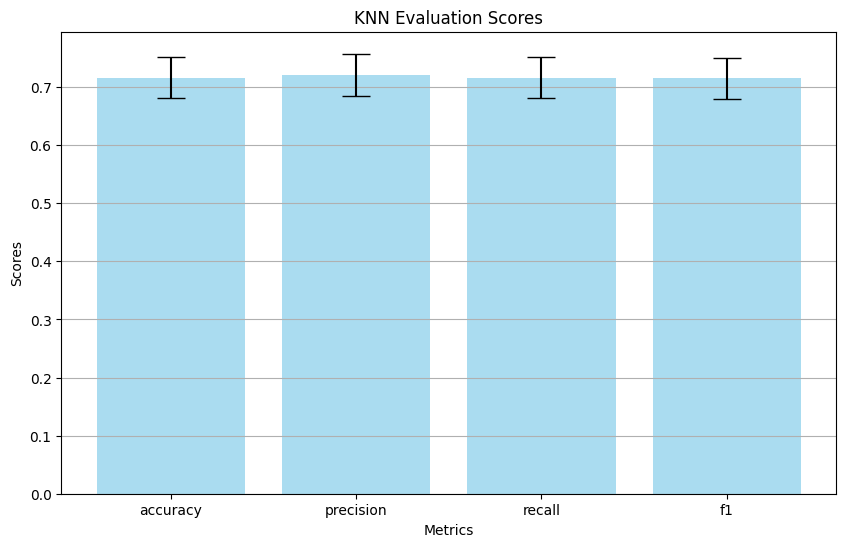

In [44]:
from sklearn.neighbors import KNeighborsClassifier

# KNN模型
X = features_scaled
y = labels
knn_model = knn

# 评估模型
knn_scores = evaluate_classification_model(knn_model, X, y, cv=10)
plot_scores(knn_scores, 'KNN Evaluation Scores')

### Improving the performance of the model

In the following subsection include your Python code on how you improved your chosen model(s). 

#### PCA

Accuracy - Mean: 0.8209, Std: 0.0174


d:\miniconda\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\miniconda\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\miniconda\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\miniconda\envs\torch\lib\site-packages\s

Precision - Mean: 0.7349, Std: 0.0131
Recall - Mean: 0.8265, Std: 0.0124
F1 - Mean: 0.7790, Std: 0.0141


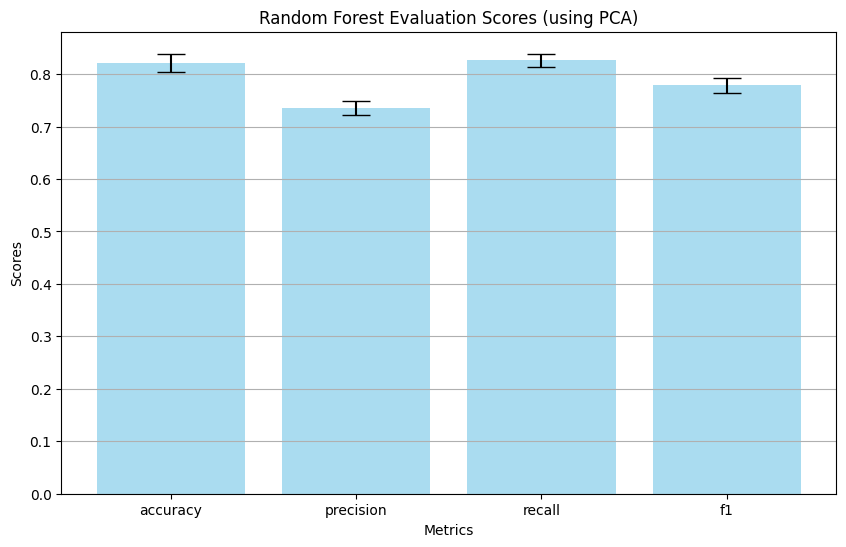

In [45]:
features = data[['ProspectiveBuyerKey', 'Age', 'MaritalStatus', 'Gender','Occupation',
    'YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome', 'StateProvinceCode','Education',
    'HouseOwnerFlag', 'NumberCarsOwned']]
target = data['Amount']
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
 
# PCA
pca = PCA(n_components=0.95)  # Retain 95% of the information  保留95%的信息
features_pca = pca.fit_transform(features_scaled)  
  
# Splitting the data into training and testing sets  
X_train, X_test, y_train, y_test = train_test_split(features_pca, target, test_size=0.3, random_state=42)  
  
# Training Random Forest Model
# 训练随机森林模型
rf = RandomForestClassifier(n_estimators=10)  
rf.fit(X_train, y_train)

# make predictions
# 评估模型
rf_scores = evaluate_classification_model(rf, X_train, y_train, cv=10)
plot_scores(rf_scores, 'Random Forest Evaluation Scores (using PCA)')

#### Ridge Regression & Lasso Regression

Ridge Regression MSE: 0.9907290610075539
Lasso Regression MSE: 1.0292152612321979


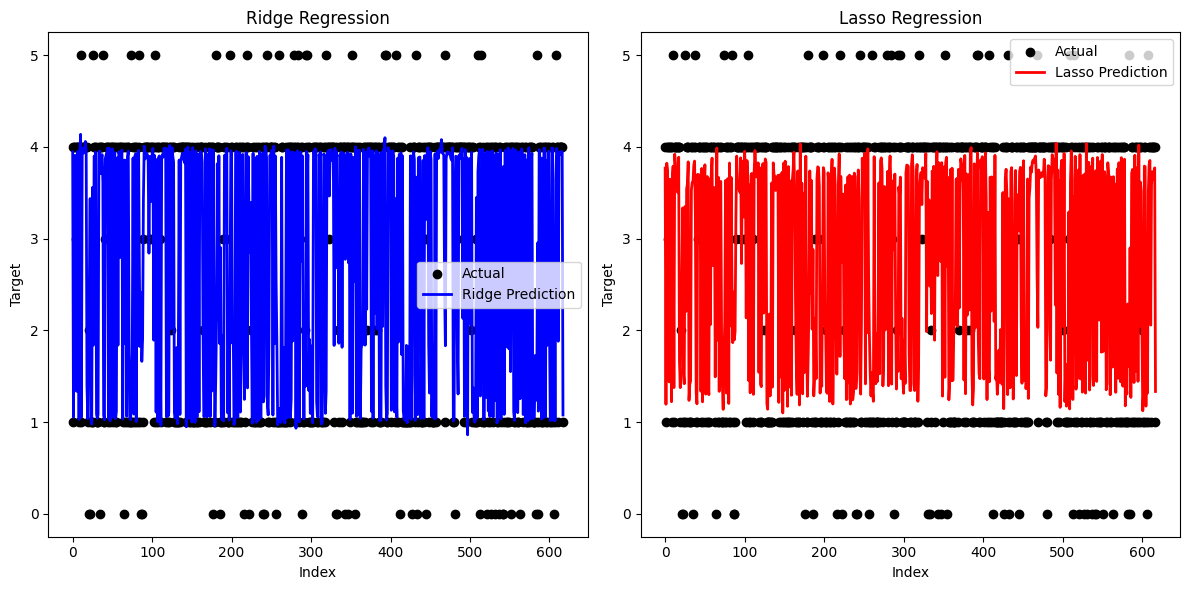

Ridge Regression performs better.


In [46]:
# Ridge Regression
# 岭回归  
ridge = Ridge(alpha=1.0)  # alpha是正则化强度  
ridge.fit(X_train, y_train)  
y_pred_ridge = ridge.predict(X_test)  
mse_ridge = mean_squared_error(y_test, y_pred_ridge)  
print(f"Ridge Regression MSE: {mse_ridge}")  
  
# Lasso Regression
# 套索回归  
lasso = Lasso(alpha=0.1)  # alpha同样是正则化强度  
lasso.fit(X_train, y_train)  
y_pred_lasso = lasso.predict(X_test)  
mse_lasso = mean_squared_error(y_test, y_pred_lasso)  
print(f"Lasso Regression MSE: {mse_lasso}")  

# Draw prediction results
# 绘制预测结果  
plt.figure(figsize=(12, 6))  
  
# Draw Ridge Regression
# 绘制岭回归  
plt.subplot(1, 2, 1)  
plt.scatter(np.arange(len(y_test)), y_test, color='black', label='Actual')  
plt.plot(np.arange(len(y_test)), y_pred_ridge, color='blue', linewidth=2, label='Ridge Prediction')  
plt.title('Ridge Regression')  
plt.xlabel('Index')  
plt.ylabel('Target')  
plt.legend()  
  
# Draw Lasso Regression
# 绘制套索回归  
plt.subplot(1, 2, 2)  
plt.scatter(np.arange(len(y_test)), y_test, color='black', label='Actual')  
plt.plot(np.arange(len(y_test)), y_pred_lasso, color='red', linewidth=2, label='Lasso Prediction')  
plt.title('Lasso Regression')  
plt.xlabel('Index')  
plt.ylabel('Target')  
plt.legend()  
  
plt.tight_layout()  
plt.show()  

# Choose a better performing model based on MSE
# 根据MSE选择表现更好的模型
if mse_ridge < mse_lasso:  
    print("Ridge Regression performs better.")  
else:  
    print("Lasso Regression performs better.")  

#### Hyperparameters Turing

In [47]:
# Hyperparameter optimization of Ridge Regression
# 岭回归的超参数调优  
ridge_params = {'alpha': [0.01, 0.1, 0.2, 0.5, 0.75, 1.0, 1.25, 1.5, 2.0, 5.0, 10.0]}  # Define the alpha value to be attempted  定义要尝试的alpha值  
ridge = Ridge()  
ridge_cv = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')  
ridge_cv.fit(X_train, y_train)  
  
# Output the optimal parameters and corresponding MSE (note that GridSearchCV returns negative MSE)
# 输出最佳参数和对应的MSE（注意GridSearchCV返回的是负MSE）  
print("Best Ridge alpha:", ridge_cv.best_params_)  
print("Best Ridge MSE:", -ridge_cv.best_score_)  

# Hyperparameter optimization of Lasso Regression
# 套索回归的超参数调优  
lasso_params = {'alpha': [0.001, 0.002, 0.005, 0.01, 0.015, 0.02, 0.025, 0.05, 0.1, 1.0, 10.0]} 
lasso = Lasso()  
lasso_cv = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')  
lasso_cv.fit(X_train, y_train)  

# Output the optimal parameters and corresponding MSE
# 输出最佳参数和对应的MSE  
print("Best Lasso alpha:", lasso_cv.best_params_)  
print("Best Lasso MSE:", -lasso_cv.best_score_)  

Best Ridge alpha: {'alpha': 0.01}
Best Ridge MSE: 0.7433217092466957
Best Lasso alpha: {'alpha': 0.005}
Best Lasso MSE: 0.7431951236435115


✍️ I improved my model by ...

### Choose the best model

In the following subsection reflect on the most appropriate machine learning model. 

#### Bagging with Random Forest

In [48]:
# Bagging with Random Forest: 
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
# make predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
# training set performance
rf_train_accuracy = accuracy_score(y_train,y_train_pred)
rf_train_mcc = matthews_corrcoef(y_train,y_train_pred)
rf_train_f1 = f1_score(y_train,y_train_pred,average='weighted')
# test set performance
rf_test_accuracy = accuracy_score(y_test,y_test_pred)
rf_test_mcc = matthews_corrcoef(y_test,y_test_pred)
rf_test_f1 = f1_score(y_test,y_test_pred,average='weighted')
print('Random Forest Model performance for Training set')
print('- Accuracy: %s' %rf_train_accuracy)
print('- MCC: %s' %rf_train_mcc)
print('- F1 score: %s' %rf_train_f1)
print('----------------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' %rf_test_accuracy)
print('- MCC: %s' %rf_test_mcc)
print('- F1 score: %s' %rf_test_f1)

Random Forest Model performance for Training set
- Accuracy: 0.9805690492713394
- MCC: 0.9676464274634489
- F1 score: 0.9800806765200883
----------------------------------------
Model performance for Test set
- Accuracy: 0.8025889967637541
- MCC: 0.672562889887199
- F1 score: 0.7392690644266184


#### Bagging with KNN

In [49]:
# KNN
knn=KNeighborsClassifier(3)
knn.fit(X_train,y_train)
# make predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
# training set performance
knn_train_accuracy = accuracy_score(y_train,y_train_pred)
knn_train_mcc = matthews_corrcoef(y_train,y_train_pred)
knn_train_f1 = f1_score(y_train,y_train_pred,average='weighted')
# test set performance
knn_test_accuracy = accuracy_score(y_test,y_test_pred)
knn_test_mcc = matthews_corrcoef(y_test,y_test_pred)
knn_test_f1 = f1_score(y_test,y_test_pred,average='weighted')
print('KNN Model performance for Training set')
print('- Accuracy: %s' %knn_train_accuracy)
print('- MCC: %s' %knn_train_mcc)
print('- F1 score: %s' %knn_train_f1)
print('----------------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' %knn_test_accuracy)
print('- MCC: %s' %knn_test_mcc)
print('- F1 score: %s' %knn_test_f1)

KNN Model performance for Training set
- Accuracy: 0.8598195697432338
- MCC: 0.7610475311170095
- F1 score: 0.8319417536073368
----------------------------------------
Model performance for Test set
- Accuracy: 0.7637540453074434
- MCC: 0.6047765810985308
- F1 score: 0.7235333101380123


#### Bagging with SVM

In [50]:
# SVM
svm_rbf = SVC(gamma=2,C=1)
svm_rbf.fit(X_train, y_train)
# make predictions
y_train_pred = svm_rbf.predict(X_train)
y_test_pred = svm_rbf.predict(X_test)
# training set performance
svm_rbf_train_accuracy = accuracy_score(y_train,y_train_pred)
svm_rbf_train_mcc = matthews_corrcoef(y_train,y_train_pred)
svm_rbf_train_f1 = f1_score(y_train,y_train_pred,average='weighted')
# test set performance
svm_rbf_test_accuracy = accuracy_score(y_test,y_test_pred)
svm_rbf_test_mcc = matthews_corrcoef(y_test,y_test_pred)
svm_rbf_test_f1 = f1_score(y_test,y_test_pred,average='weighted')
print('SVM Model performance for Training set')
print('- Accuracy: %s' %svm_rbf_train_accuracy)
print('- MCC: %s' %svm_rbf_train_mcc)
print('- F1 score: %s' %svm_rbf_train_f1)
print('----------------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' %svm_rbf_test_accuracy)
print('- MCC: %s' %svm_rbf_test_mcc)
print('- F1 score: %s' %svm_rbf_test_f1)

SVM Model performance for Training set
- Accuracy: 0.9777931991672449
- MCC: 0.9630384017250969
- F1 score: 0.9768501125824054
----------------------------------------
Model performance for Test set
- Accuracy: 0.5970873786407767
- MCC: 0.3144118385033816
- F1 score: 0.5054073374289737


#### Boosting with AdaBoost

In [51]:
# Boosting with AdaBoost:
ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
# Predict
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)
# training set performance
ada_train_accuracy = accuracy_score(y_train,y_train_pred)
ada_train_mcc = matthews_corrcoef(y_train,y_train_pred)
ada_train_f1 = f1_score(y_train,y_train_pred,average='weighted')
# test set performance
ada_test_accuracy = accuracy_score(y_test,y_test_pred)
ada_test_mcc = matthews_corrcoef(y_test,y_test_pred)
ada_test_f1 = f1_score(y_test,y_test_pred,average='weighted')
print('AdaBoost Model performance for Training set')
print('- Accuracy: %s' %ada_train_accuracy)
print('- MCC: %s' %ada_train_mcc)
print('- F1 score: %s' %ada_train_f1)
print('----------------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' %ada_test_accuracy)
print('- MCC: %s' %ada_test_mcc)
print('- F1 score: %s' %ada_test_f1)

d:\miniconda\envs\torch\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Model performance for Training set
- Accuracy: 0.6419153365718251
- MCC: 0.44800061474980796
- F1 score: 0.6749388864928643
----------------------------------------
Model performance for Test set
- Accuracy: 0.5938511326860841
- MCC: 0.3900927870928499
- F1 score: 0.6271357775902282


#### Stacking

In [52]:
# Stacking:
# Define base models
base_models = [
    ('dt', DecisionTreeClassifier(max_depth=3)),
    ('svm', SVC(kernel='linear', probability=True))
]
# Define meta-model
meta_model = LogisticRegression()
# Train stacking model
stacking = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stacking.fit(X_train, y_train)
# Predict
y_train_pred = stacking.predict(X_train)
y_test_pred = stacking.predict(X_test)
# training set performance
stacking_train_accuracy = accuracy_score(y_train,y_train_pred)
stacking_train_mcc = matthews_corrcoef(y_train,y_train_pred)
stacking_train_f1 = f1_score(y_train,y_train_pred,average='weighted')
# test set performance
stacking_test_accuracy = accuracy_score(y_test,y_test_pred)
stacking_test_mcc = matthews_corrcoef(y_test,y_test_pred)
stacking_test_f1 = f1_score(y_test,y_test_pred,average='weighted')
print('stacking Model performance for Training set')
print('- Accuracy: %s' %stacking_train_accuracy)
print('- MCC: %s' %stacking_train_mcc)
print('- F1 score: %s' %stacking_train_f1)
print('----------------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' %stacking_test_accuracy)
print('- MCC: %s' %stacking_test_mcc)
print('- F1 score: %s' %stacking_test_f1)

stacking Model performance for Training set
- Accuracy: 0.84941013185288
- MCC: 0.7394530426641607
- F1 score: 0.791714673468412
----------------------------------------
Model performance for Test set
- Accuracy: 0.813915857605178
- MCC: 0.6890080950518634
- F1 score: 0.7430179718235914


#### Final Result

In [53]:
acc_train_list = { 
    'knn':knn_train_accuracy,
    'svm_rbf':svm_rbf_train_accuracy,
    'rf':rf_train_accuracy,
    'ada':ada_train_accuracy,
    'stacking':stacking_train_accuracy,
}

mcc_train_list = { 
    'knn':knn_train_mcc,
    'svm_rbf':svm_rbf_train_mcc,
    'rf':rf_train_mcc,
    'ada':ada_train_mcc,
    'stacking':stacking_train_mcc,
}

f1_train_list = { 
    'knn':knn_train_f1,
    'svm_rbf':svm_rbf_train_f1,
    'rf':rf_train_f1,
    'ada':ada_train_f1,
    'stacking':stacking_train_f1,
}

acc_df= pd.DataFrame.from_dict(acc_train_list, orient='index', columns=['Accuracy'])
mcc_df= pd.DataFrame.from_dict(mcc_train_list, orient='index', columns=['MCC'])
f1_df= pd.DataFrame.from_dict(f1_train_list, orient='index', columns=['F1'])
df=pd.concat([acc_df,mcc_df,f1_df],axis=1)
df

,Accuracy,MCC,F1
knn,0.859820,0.761048,0.831942
svm_rbf,0.977793,0.963038,0.976850
rf,0.980569,0.967646,0.980081
ada,0.641915,0.448001,0.674939
stacking,0.849410,0.739453,0.791715


✍️ Random Forest is the best because it has the highest accuracy, MCC, and F1 score.